In [2]:
# pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

In [4]:
combined = pd.read_csv('Dataset.csv')

In [5]:
rows_to_drop = combined.loc[combined['Patient_ID'].apply(lambda x: len(str(x)) == 6)]
df_train = combined.drop(rows_to_drop.index)
df_train.to_csv('data_part1.csv', index=False)

In [6]:
rows_to_drop = combined.loc[combined['Patient_ID'].apply(lambda x: len(str(x)) != 6)]
df_test = combined.drop(rows_to_drop.index)
df_test.to_csv('data_part2.csv', index=False)

In [7]:
df_train = pd.read_csv('data_part1.csv')
df_test = pd.read_csv('data_part2.csv')

In [8]:
df_train.head(15)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072
5,5,5,62.0,100.0,NaN,124.0,85.0,61.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,6,0,17072
6,6,6,61.0,100.0,NaN,101.0,75.0,58.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,7,0,17072
7,7,7,68.0,100.0,35.78,142.0,93.5,78.0,16.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,8,0,17072
8,8,8,71.0,100.0,NaN,121.0,74.0,91.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,9,0,17072
9,9,9,69.0,100.0,NaN,120.0,79.0,98.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,10,0,17072


In [9]:
df_train.columns

Index(['Unnamed: 0', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP',
       'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2',
       'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

In [10]:
# list of all the unique patients
# total number of patients present in the dataset

patients = list(df_test['Patient_ID'].unique())
len(patients)

20000

In [11]:
def corr_matrix(df):
  corr = df.corr()
  mask = np.triu(np.ones_like(corr, dtype=bool))
  f, ax = plt.subplots(figsize=(40,40))
  cmap = sns.diverging_palette(220, 10, as_cmap=True)
  sns.heatmap(corr, mask=mask, cmap="Paired", vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [12]:
null_values = df_train.isnull().mean()*100
null_values = null_values.sort_values(ascending=False)
null_values

EtCO2               100.000000
TroponinI            99.877881
Bilirubin_direct     99.850420
Fibrinogen           99.236917
Bilirubin_total      98.773372
Alkalinephos         98.540650
AST                  98.504205
Lactate              96.565112
PTT                  95.152459
SaO2                 95.044387
Calcium              95.024392
Phosphate            94.951247
Platelets            93.482913
Creatinine           93.357884
WBC                  92.489639
Magnesium            92.219712
HCO3                 91.949406
BUN                  91.840702
Chloride             91.676063
PaCO2                91.231753
Hgb                  91.164303
BaseExcess           89.574863
Potassium            89.137640
pH                   88.532868
Hct                  88.223711
Glucose              87.768392
FiO2                 85.807027
Temp                 66.224255
Unit2                48.868346
Unit1                48.868346
DBP                  48.125763
SBP                  15.211177
O2Sat   

In [13]:
df_train['Unit1'].tail()

790210   NaN
790211   NaN
790212   NaN
790213   NaN
790214   NaN
Name: Unit1, dtype: float64

In [14]:
columns_drop={'Unnamed: 0','SBP','DBP','EtCO2','BaseExcess', 'HCO3','pH','PaCO2','Alkalinephos', 'Calcium','Magnesium', 
'Phosphate','Potassium','PTT','Fibrinogen','Unit1','Unit2'}
df_train = df_train.assign(Unit=df_train['Unit1'] + df_train['Unit2'])
df_train_mod = df_train.drop(columns=columns_drop)
df_train_mod.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'FiO2', 'SaO2', 'AST',
       'BUN', 'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose',
       'Lactate', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC',
       'Platelets', 'Age', 'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel',
       'Patient_ID', 'Unit'],
      dtype='object')

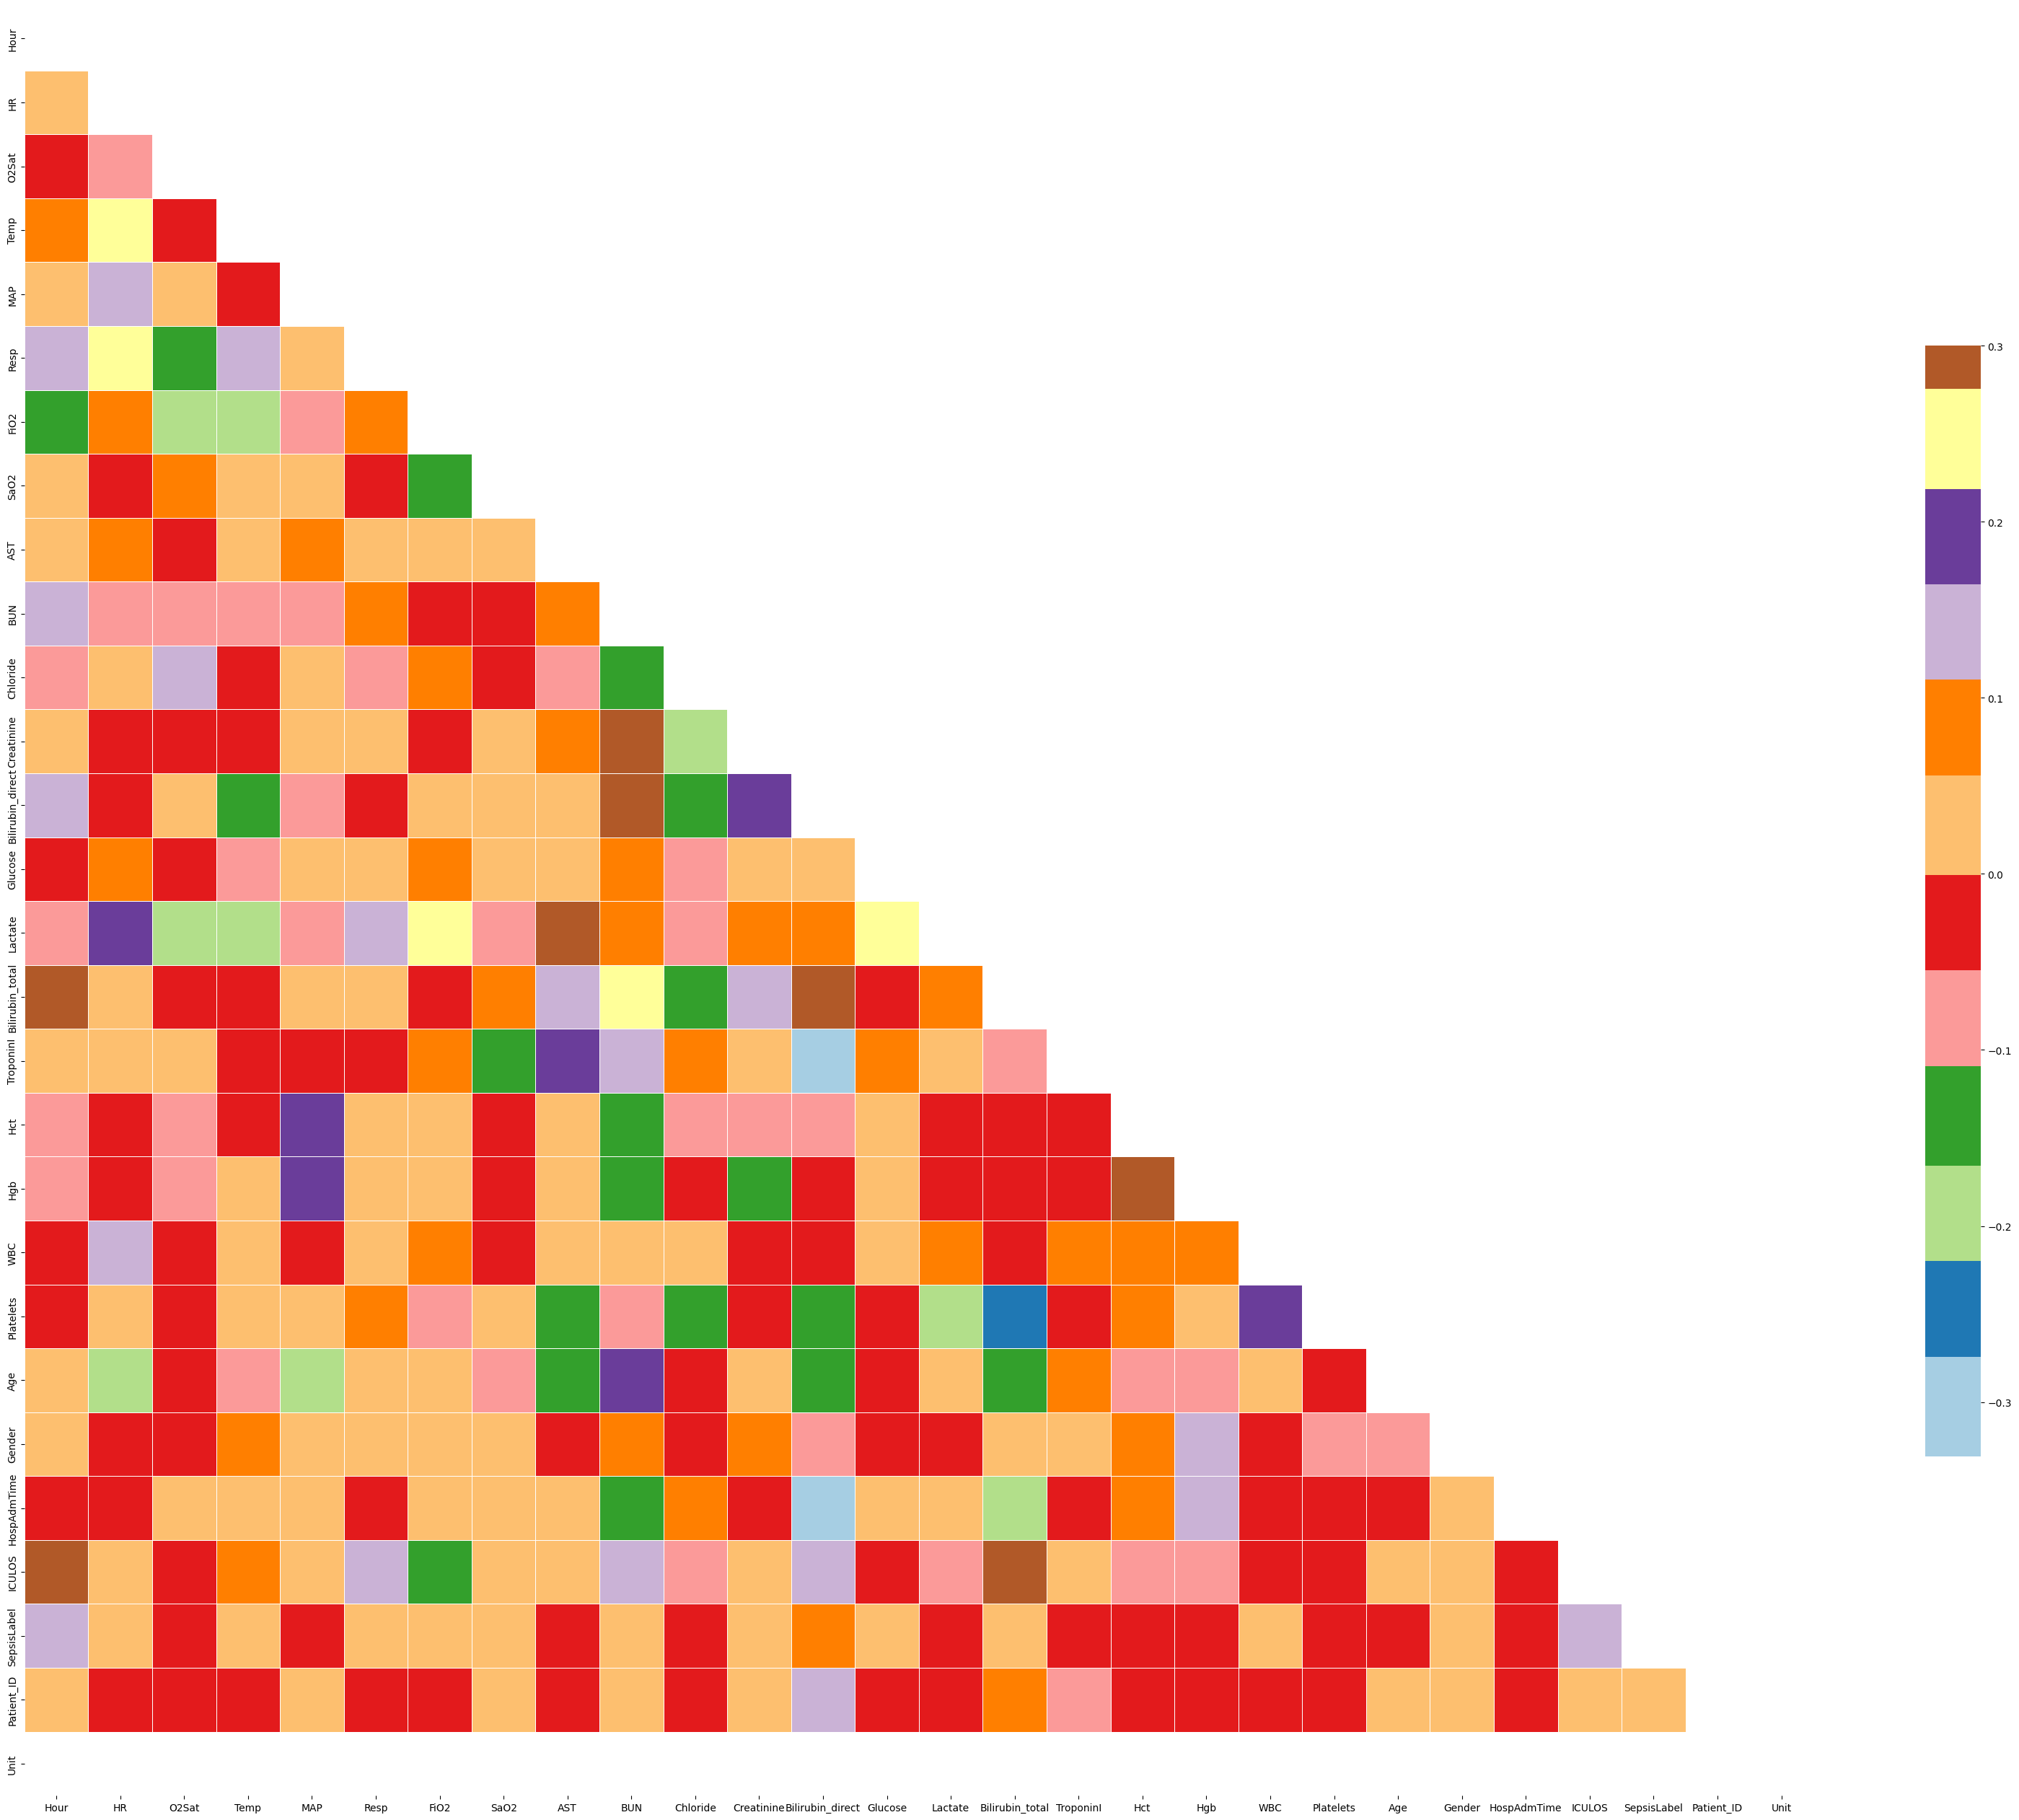

In [15]:
# correlation matrix to check if there is high correlation between the remaining features

corr_matrix(df_train_mod)

## Imputation

Since there are a lot of missing values in the dataset, therefore imputation was done to fill the missing values. While imputing, it is important to note that imputation should be done on per patient basis, otherwise the data from one patient will leak into the data of the other patient. Also another point that should be taken into consideration is that mean, median, mode can not directly be used to impute as it will result in uneven distribution of the parameters with respect to time.

In [16]:
df_train_impute = df_train_mod.copy()
columns_impute = list(df_train_impute.columns)

In [17]:
grouped_by_patient = df_train_impute.groupby('Patient_ID')
df_train_impute = grouped_by_patient.apply(lambda x: x.bfill().ffill())

C:\Users\HP\AppData\Local\Temp\ipykernel_11116\773179487.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_train_impute = grouped_by_patient.apply(lambda x: x.bfill().ffill())


In [18]:
df_train_impute.head()

Hour     HR  O2Sat   Temp    MAP  Resp  FiO2  SaO2   AST  \
Patient_ID                                                                    
1          132940     0   97.0   95.0  36.11  75.33  19.0  0.28  88.0  16.0   
           132941     1   97.0   95.0  36.11  75.33  19.0  0.28  88.0  16.0   
           132942     2   89.0   99.0  36.11  86.00  22.0  0.28  88.0  16.0   
           132943     3   90.0   95.0  36.11  91.33  30.0  0.28  88.0  16.0   
           132944     4  103.0   88.5  36.11  91.33  24.5  0.28  88.0  16.0   

                    BUN  ...   Hgb  WBC  Platelets    Age  Gender  \
Patient_ID               ...                                        
1          132940  14.0  ...  12.5  5.7      317.0  83.14       0   
           132941  14.0  ...  12.5  5.7      317.0  83.14       0   
           132942  14.0  ...  12.5  5.7      317.0  83.14       0   
           132943  14.0  ...  12.5  5.7      317.0  83.14       0   
           132944  14.0  ...  12.5  5.7      317.0  83.14       0   

                   HospAdmTime  ICULOS  SepsisLabel  Patient_ID  Unit  
Patient_ID                                                             
1          132940        -0.03       1            0           1   NaN  
           132941        -0.03       2            0           1   NaN  
           132942        -0.03       3            0           1   NaN  
           132943        -0.03       4            0           1   NaN  
           132944        -0.03       5            0           1   NaN  

[5 rows x 28 columns]

In [19]:
# Now let's check the remaining proportion of missing values

null_values = df_train_impute.isnull().mean()*100
null_values = null_values.sort_values(ascending=False)
null_values

TroponinI           97.357934
Bilirubin_direct    96.256841
Bilirubin_total     66.949754
AST                 66.435590
SaO2                57.282891
Lactate             55.997418
Unit                48.868346
FiO2                36.195592
WBC                  1.511994
Platelets            1.394810
Chloride             1.310656
Hgb                  1.158672
Creatinine           1.029467
Glucose              0.940630
BUN                  0.937719
Temp                 0.853692
Hct                  0.779028
Resp                 0.088710
O2Sat                0.026702
MAP                  0.003037
HR                   0.001139
HospAdmTime          0.001012
Hour                 0.000000
Age                  0.000000
Gender               0.000000
ICULOS               0.000000
SepsisLabel          0.000000
Patient_ID           0.000000
dtype: float64

'TroponinI', 'Bilirubin_direct', 'AST', 'Bilirubin_total', 'Lactate', 'SaO2', 'FiO2', 'Unit', 'Patient_ID' have more than 25 percent of null values and hence are dropped from the dataset.

In [20]:
# dropping all the columns with null values more than 25% and patient_id

null_col = ['TroponinI', 'Bilirubin_direct', 'AST', 'Bilirubin_total', 'Lactate', 'SaO2', 'FiO2',
            'Unit', 'Patient_ID']
df_train_impute = df_train_impute.drop(columns=null_col)
df_train_impute.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets', 'Age',
       'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [21]:
# onehot encoding the gender

one_hot = pd.get_dummies(df_train_impute['Gender'])
df_train_impute = df_train_impute.join(one_hot)
df_train_impute = df_train_impute.drop('Gender', axis=1)

## Gaussian Transformation and Standard Normalization

Generally models tend to give a better result for a normal ditribution. So in the below cells we explored different techniques to plot histograms and QQ plots of all the features and then we applied different transformations on it to see which were giving good results. The ones giving the beest results were then adopted in the dataframe.

In [22]:
# function to draw histogram and QQ plot 

def diagnostic_plots(df, variable):
    fig = plt.figure(figsize=(15,4))
    ax = fig.add_subplot(121)
    df[variable].hist(bins=30)
    ax = fig.add_subplot(122)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.xlabel(variable)
    plt.show()

In [23]:
def try_gaussian(df, col):
  print('actual plot')
  diagnostic_plots(df,col)
  # this applies yeojohnson plot
  df['col_yj'], param = stats.yeojohnson(df[col]) 
  print('yeojohnson plot')
  diagnostic_plots(df, 'col_yj')
  # this applies exponential transformation
  df['col_1.5'] = df[col]**(1/1.5)
  print('**1/1.5 plot') 
  diagnostic_plots(df, 'col_1.5')
  df['col_.5'] = df[col]**(.5)
  print('**.5 plot') 
  # this applies inverse transformation
  diagnostic_plots(df, 'col_.5')
  df['col_rec'] = 1 / (df[col]+0.00001) 
  diagnostic_plots(df, 'col_rec')
  # this applies logarithmic trasnformation
  df['col_log'] = np.log(df[col]+1)
  diagnostic_plots(df, 'col_log')    

O2Sat
actual plot


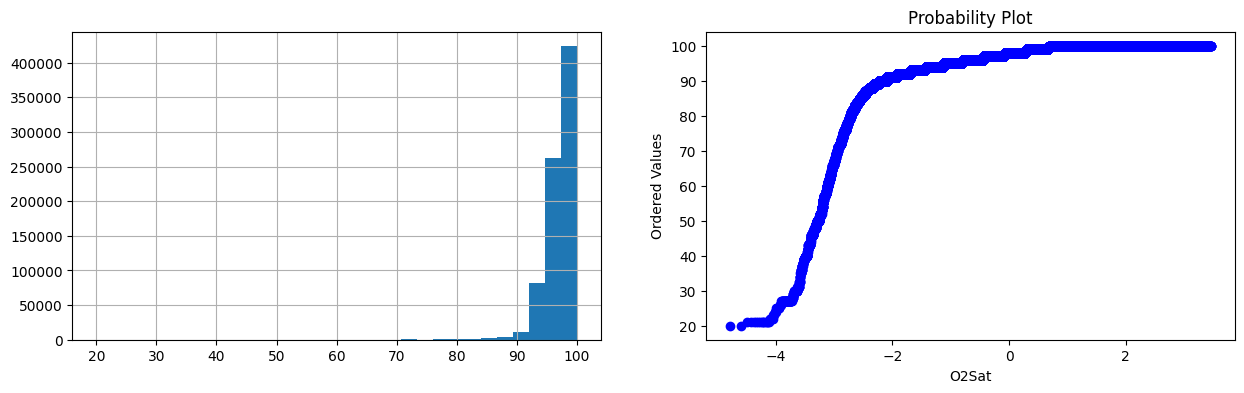

ValueError: Yeo-Johnson input must be finite.

In [24]:
lst = ['O2Sat', 'Temp', 'MAP', 'BUN', 'Creatinine', 'Glucose', 'WBC', 'Platelets' ]
for i in lst:
  print(i)
  try_gaussian(df_train_impute, i)

In [25]:
df_train_impute.columns

Index([       'Hour',          'HR',       'O2Sat',        'Temp',
               'MAP',        'Resp',         'BUN',    'Chloride',
        'Creatinine',     'Glucose',         'Hct',         'Hgb',
               'WBC',   'Platelets',         'Age', 'HospAdmTime',
            'ICULOS', 'SepsisLabel',             0,             1],
      dtype='object')

In [26]:
# after application of the above code, some redundant columns got added to the dataframe, which are removed through this line of code

df_train_impute = df_train_impute.drop(columns = ['col_yj','col_1.5','col_.5','col_rec','col_log'])

KeyError: "['col_yj', 'col_1.5', 'col_.5', 'col_rec', 'col_log'] not found in axis"

In [27]:
df_train_impute.head()

Hour     HR  O2Sat   Temp    MAP  Resp   BUN  Chloride  \
Patient_ID                                                                  
1          132940     0   97.0   95.0  36.11  75.33  19.0  14.0      85.0   
           132941     1   97.0   95.0  36.11  75.33  19.0  14.0      85.0   
           132942     2   89.0   99.0  36.11  86.00  22.0  14.0      85.0   
           132943     3   90.0   95.0  36.11  91.33  30.0  14.0      85.0   
           132944     4  103.0   88.5  36.11  91.33  24.5  14.0      85.0   

                   Creatinine  Glucose   Hct   Hgb  WBC  Platelets    Age  \
Patient_ID                                                                  
1          132940         0.7    193.0  37.2  12.5  5.7      317.0  83.14   
           132941         0.7    193.0  37.2  12.5  5.7      317.0  83.14   
           132942         0.7    193.0  37.2  12.5  5.7      317.0  83.14   
           132943         0.7    193.0  37.2  12.5  5.7      317.0  83.14   
           132944         0.7    193.0  37.2  12.5  5.7      317.0  83.14   

                   HospAdmTime  ICULOS  SepsisLabel     0      1  
Patient_ID                                                        
1          132940        -0.03       1            0  True  False  
           132941        -0.03       2            0  True  False  
           132942        -0.03       3            0  True  False  
           132943        -0.03       4            0  True  False  
           132944        -0.03       5            0  True  False

In [28]:
# by oserving different plots, it can be concluded that only log was somewhat effective and that too for MAP, BUN, Creatinine, Glucose, WBC & Plateletes
# therefore applying log transformations on the above columns

columns_normalized = ['MAP', 'BUN', 'Creatinine', 'Glucose', 'WBC', 'Platelets' ]
for i in columns_normalized:
  df_train_impute[i] = np.log(df_train_impute[i]+1)

In [29]:
df_train_impute.head()

Hour     HR  O2Sat   Temp       MAP  Resp      BUN  \
Patient_ID                                                              
1          132940     0   97.0   95.0  36.11  4.335066  19.0  2.70805   
           132941     1   97.0   95.0  36.11  4.335066  19.0  2.70805   
           132942     2   89.0   99.0  36.11  4.465908  22.0  2.70805   
           132943     3   90.0   95.0  36.11  4.525369  30.0  2.70805   
           132944     4  103.0   88.5  36.11  4.525369  24.5  2.70805   

                   Chloride  Creatinine   Glucose   Hct   Hgb       WBC  \
Patient_ID                                                                
1          132940      85.0    0.530628  5.267858  37.2  12.5  1.902108   
           132941      85.0    0.530628  5.267858  37.2  12.5  1.902108   
           132942      85.0    0.530628  5.267858  37.2  12.5  1.902108   
           132943      85.0    0.530628  5.267858  37.2  12.5  1.902108   
           132944      85.0    0.530628  5.267858  37.2  12.5  1.902108   

                   Platelets    Age  HospAdmTime  ICULOS  SepsisLabel     0  \
Patient_ID                                                                    
1          132940   5.762051  83.14        -0.03       1            0  True   
           132941   5.762051  83.14        -0.03       2            0  True   
           132942   5.762051  83.14        -0.03       3            0  True   
           132943   5.762051  83.14        -0.03       4            0  True   
           132944   5.762051  83.14        -0.03       5            0  True   

                       1  
Patient_ID                
1          132940  False  
           132941  False  
           132942  False  
           132943  False  
           132944  False

In [30]:
# standard normalization

scaler = StandardScaler()
df_train_impute[['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']] = scaler.fit_transform(df_train_impute[['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']])
df_train_impute.head()

Hour        HR     O2Sat      Temp       MAP      Resp  \
Patient_ID                                                                  
1          132940     0  0.705950 -0.685827 -1.105823 -0.157228  0.043895   
           132941     1  0.705950 -0.685827 -1.105823 -0.157228  0.043895   
           132942     2  0.236955  0.555029 -1.105823  0.547988  0.600192   
           132943     3  0.295579 -0.685827 -1.105823  0.868472  2.083649   
           132944     4  1.057696 -2.702217 -1.105823  0.868472  1.063772   

                        BUN  Chloride  Creatinine   Glucose       Hct  \
Patient_ID                                                              
1          132940 -0.413042 -3.697098   -0.560343  1.444179  1.231844   
           132941 -0.413042 -3.697098   -0.560343  1.444179  1.231844   
           132942 -0.413042 -3.697098   -0.560343  1.444179  1.231844   
           132943 -0.413042 -3.697098   -0.560343  1.444179  1.231844   
           132944 -0.413042 -3.697098   -0.560343  1.444179  1.231844   

                        Hgb       WBC  Platelets    Age  HospAdmTime  ICULOS  \
Patient_ID                                                                     
1          132940  1.114903 -1.288936   1.062522  83.14        -0.03       1   
           132941  1.114903 -1.288936   1.062522  83.14        -0.03       2   
           132942  1.114903 -1.288936   1.062522  83.14        -0.03       3   
           132943  1.114903 -1.288936   1.062522  83.14        -0.03       4   
           132944  1.114903 -1.288936   1.062522  83.14        -0.03       5   

                   SepsisLabel     0      1  
Patient_ID                                   
1          132940            0  True  False  
           132941            0  True  False  
           132942            0  True  False  
           132943            0  True  False  
           132944            0  True  False

In [31]:
df_train_impute = df_train_impute.dropna()

In [32]:
null_values = df_train_impute.isnull().mean()*100
null_values

Hour           0.0
HR             0.0
O2Sat          0.0
Temp           0.0
MAP            0.0
Resp           0.0
BUN            0.0
Chloride       0.0
Creatinine     0.0
Glucose        0.0
Hct            0.0
Hgb            0.0
WBC            0.0
Platelets      0.0
Age            0.0
HospAdmTime    0.0
ICULOS         0.0
SepsisLabel    0.0
0              0.0
1              0.0
dtype: float64

In [33]:
df_train_impute.head(5)

Hour        HR     O2Sat      Temp       MAP      Resp  \
Patient_ID                                                                  
1          132940     0  0.705950 -0.685827 -1.105823 -0.157228  0.043895   
           132941     1  0.705950 -0.685827 -1.105823 -0.157228  0.043895   
           132942     2  0.236955  0.555029 -1.105823  0.547988  0.600192   
           132943     3  0.295579 -0.685827 -1.105823  0.868472  2.083649   
           132944     4  1.057696 -2.702217 -1.105823  0.868472  1.063772   

                        BUN  Chloride  Creatinine   Glucose       Hct  \
Patient_ID                                                              
1          132940 -0.413042 -3.697098   -0.560343  1.444179  1.231844   
           132941 -0.413042 -3.697098   -0.560343  1.444179  1.231844   
           132942 -0.413042 -3.697098   -0.560343  1.444179  1.231844   
           132943 -0.413042 -3.697098   -0.560343  1.444179  1.231844   
           132944 -0.413042 -3.697098   -0.560343  1.444179  1.231844   

                        Hgb       WBC  Platelets    Age  HospAdmTime  ICULOS  \
Patient_ID                                                                     
1          132940  1.114903 -1.288936   1.062522  83.14        -0.03       1   
           132941  1.114903 -1.288936   1.062522  83.14        -0.03       2   
           132942  1.114903 -1.288936   1.062522  83.14        -0.03       3   
           132943  1.114903 -1.288936   1.062522  83.14        -0.03       4   
           132944  1.114903 -1.288936   1.062522  83.14        -0.03       5   

                   SepsisLabel     0      1  
Patient_ID                                   
1          132940            0  True  False  
           132941            0  True  False  
           132942            0  True  False  
           132943            0  True  False  
           132944            0  True  False

In [34]:
# checking the distribution of data points between the two classes

majority_class = df_train_impute[df_train_impute['SepsisLabel'] == 0]
minority_class = df_train_impute[df_train_impute['SepsisLabel'] == 1]
print('number of sepsis label 1 is {}'.format(len(minority_class)))
print('while number of sepsis label 0 is {}'.format(len(majority_class)))

number of sepsis label 1 is 15284
while number of sepsis label 0 is 750935


In [35]:
# Undersampling

majority_class_subset = majority_class.sample(n=2*len(minority_class))
df_train_impute = pd.concat([majority_class_subset, minority_class])

In [36]:
df_train_impute.head(5)

,,Hour,HR,O2Sat,Temp,MAP,Resp,BUN,Chloride,Creatinine,Glucose,Hct,Hgb,WBC,Platelets,Age,HospAdmTime,ICULOS,SepsisLabel,0,1
Patient_ID,,,,,,,,,,,,,,,,,,,,,
7338,529711,12,-0.173416,-0.065399,0.089059,0.670489,0.600192,0.037457,0.869424,0.341885,-0.822764,0.450080,0.054438,0.830944,1.950162,81.43,-34.75,14,0,True,False
1092,17777,49,-0.642411,0.555029,-0.810459,0.547988,-0.512401,1.042574,-1.505167,2.825025,-1.752412,-0.681420,-1.006027,0.370127,0.480168,65.04,-0.02,54,0,False,True
4946,618273,8,-1.052781,0.244815,-1.025269,-1.923651,-1.068698,0.868399,1.417407,0.230534,0.032705,0.141490,-0.063391,1.300899,-0.745291,59.22,-11.94,9,0,False,True
13652,624477,15,-1.404527,-1.616468,0.532105,-1.826535,0.043895,2.128015,-2.966454,2.463573,-0.411435,-1.319174,-1.182771,-0.225016,-2.068093,62.70,-213.24,16,0,True,False
4424,406419,34,-0.232040,0.865243,0.532105,-0.275738,-0.141537,0.386891,-0.409202,-0.007482,0.032705,0.758671,0.231182,-0.180333,-0.992807,86.75,-91.55,41,0,True,False


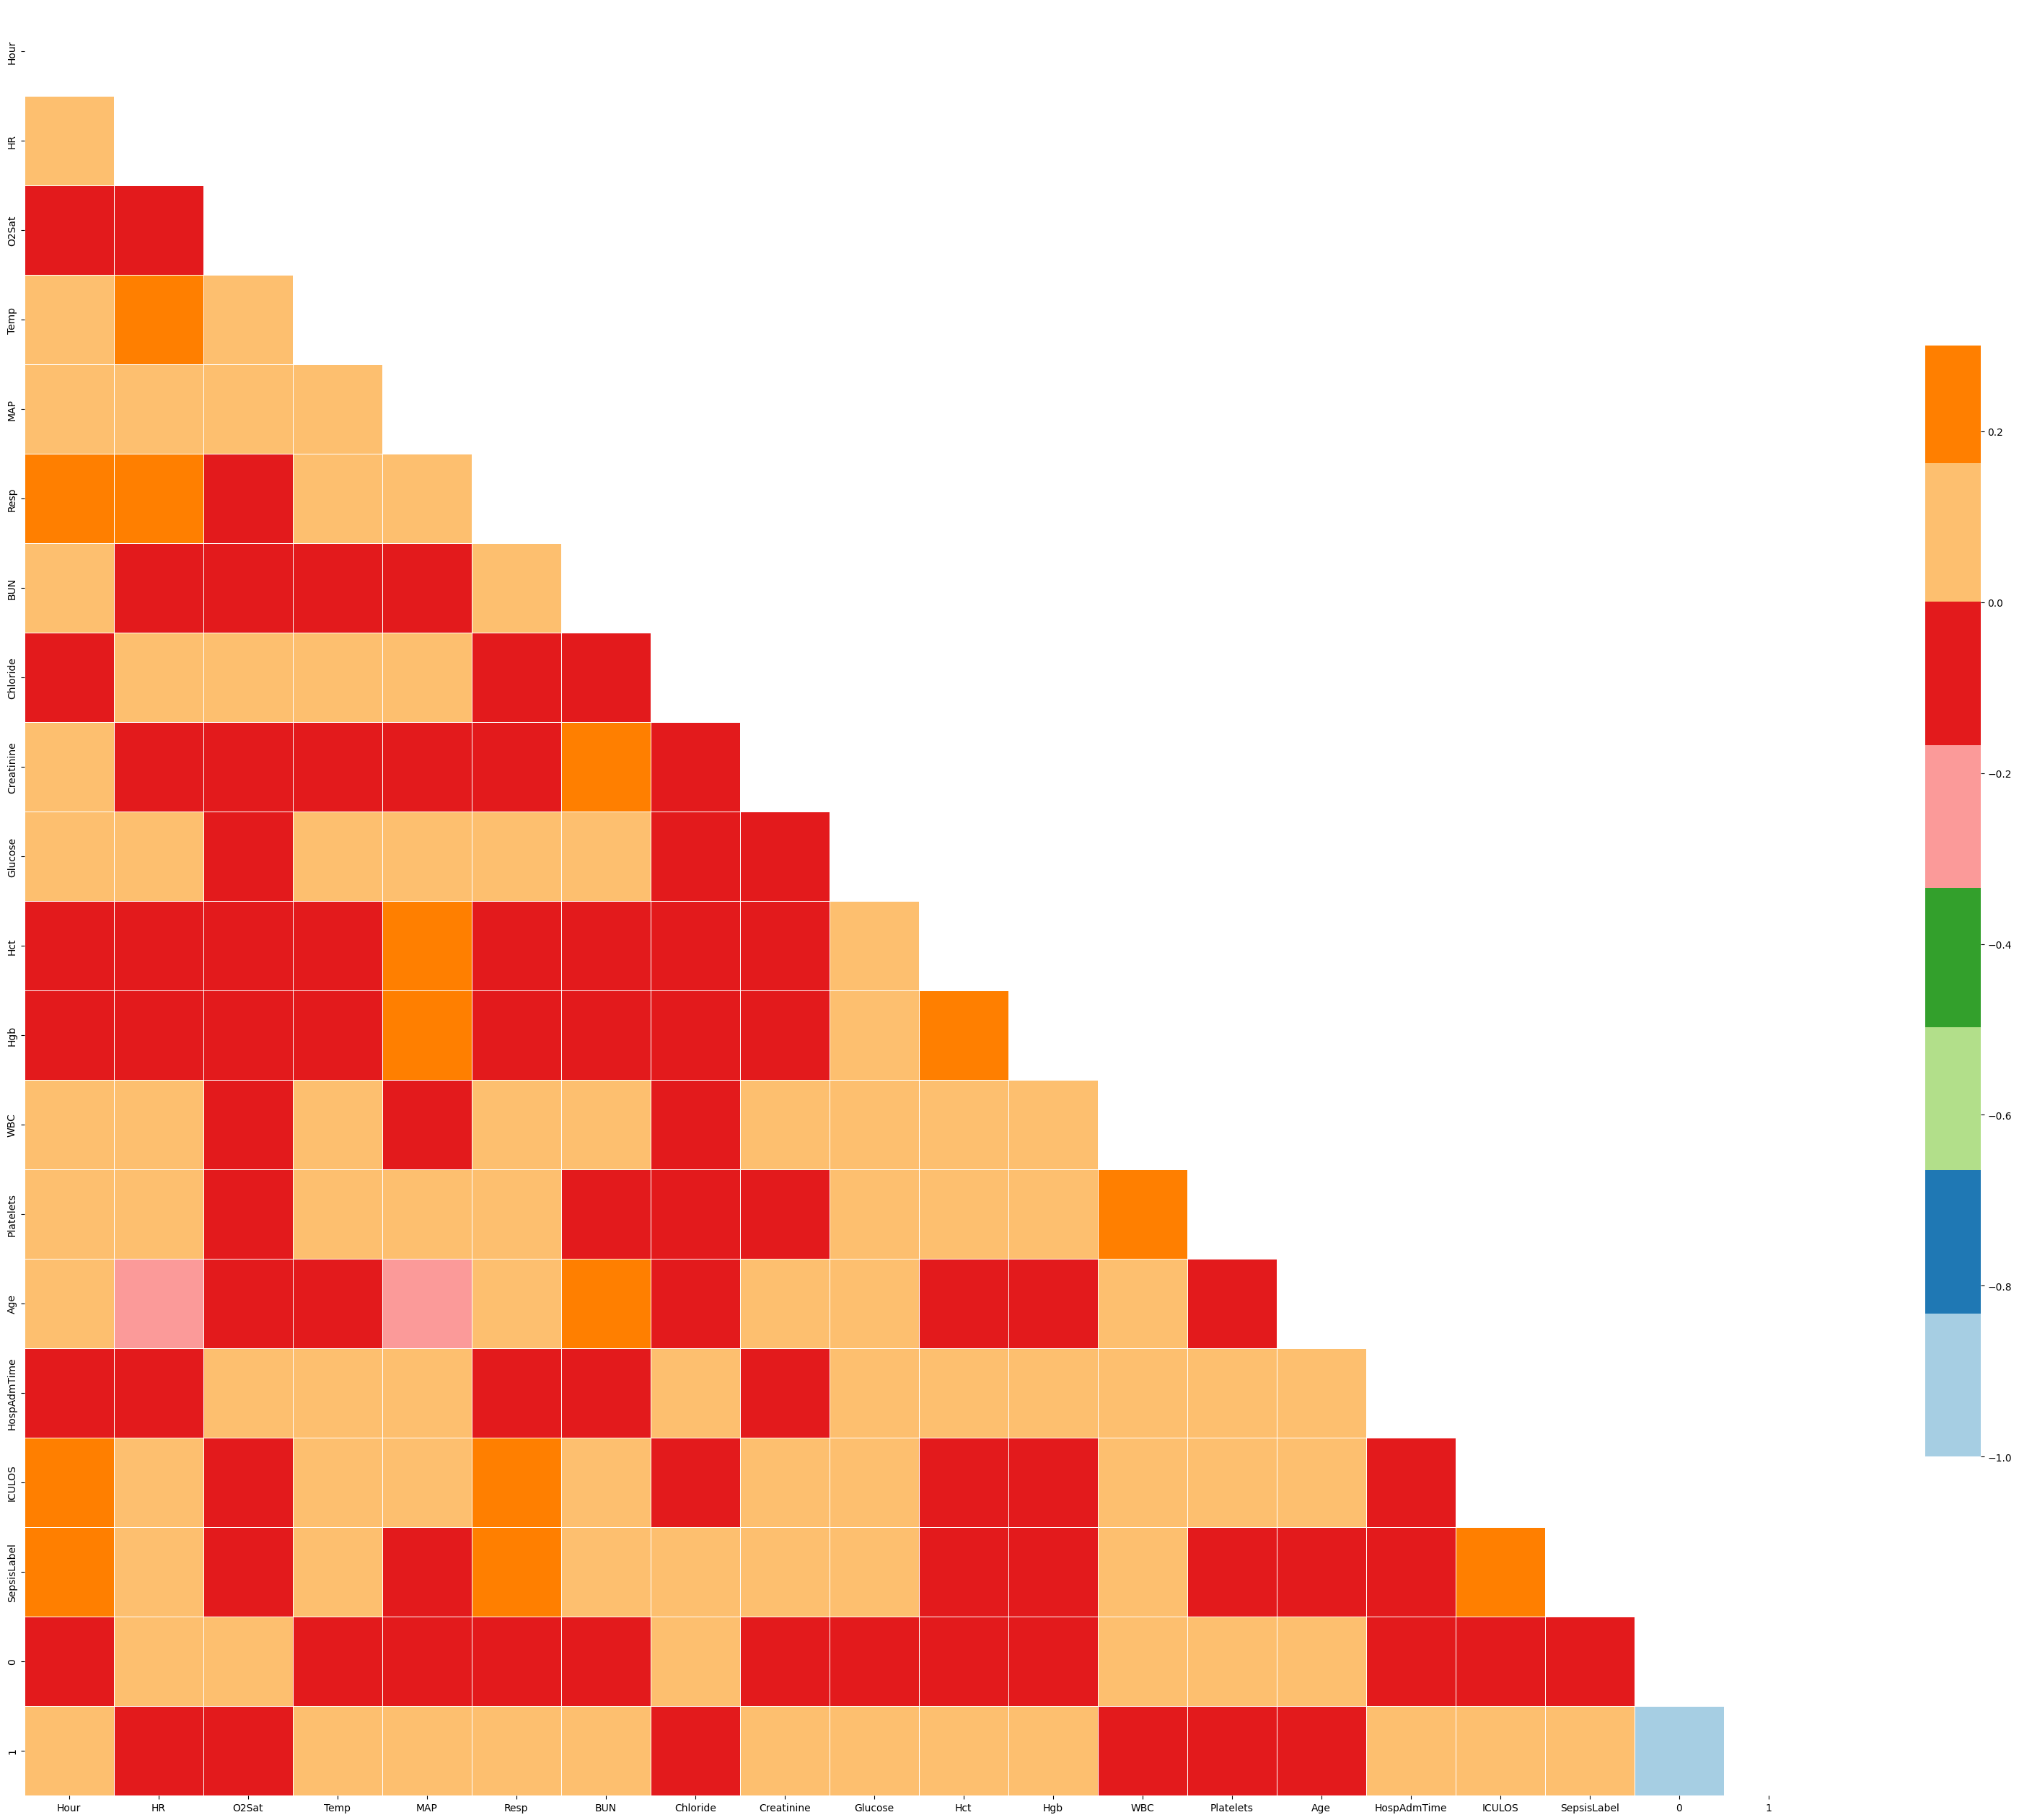

In [37]:
corr_matrix(df_train_impute)

In [38]:
df_train_impute.to_csv('data_cleaned.csv', index=False)

In [39]:
# this fucntion calculates different evaluation parameters of a model

def evaluate_model(y_true,y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  print("Accuracy:", accuracy)
  precision = precision_score(y_true, y_pred)
  print("Precision:", precision)
  recall = recall_score(y_true, y_pred)
  print("Recall:", recall)
  f1 = f1_score(y_true, y_pred)
  print("F1 Score:", f1)
  auc = roc_auc_score(y_true, y_pred)
  print("AUC-ROC:", auc)
  mae = mean_absolute_error(y_true, y_pred)
  print("Mean Absolute Error:", mae)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  print("Root Mean Squared Error:", rmse)
  cm = confusion_matrix(y_true, y_pred)
  sns.heatmap(cm, annot=True, fmt='d')
  plt.show()

## Random Forest

In [40]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_absolute_error, mean_squared_error
#import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [41]:
df_train_impute.rename(columns={0:'male',1:'female'},inplace=True)

In [42]:
X = df_train_impute.drop('SepsisLabel', axis=1)
y = pd.DataFrame(df_train_impute['SepsisLabel'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
model = RandomForestClassifier(n_estimators=300, random_state=0)
model.fit(X_train, y_train)

c:\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=300, random_state=0)

In [44]:
rcf_predictions = model.predict(X_test)

Accuracy: 0.9548577036310107
Precision: 0.9156441717791411
Recall: 0.95550576184379
F1 Score: 0.9351503759398496
AUC-ROC: 0.9550143328815444
Mean Absolute Error: 0.045142296368989206
Root Mean Squared Error: 0.21246716539030025


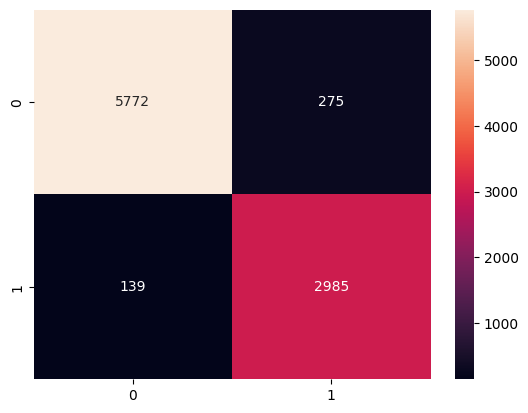

In [45]:
evaluate_model(y_test,rcf_predictions)

In [46]:
import joblib

In [47]:
joblib.dump(model, 'model.pkl')

['model.pkl']